<a href="https://colab.research.google.com/github/Joezy123456/web/blob/main/SILHOUETTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [4]:
# Upload the DIABETIC dataset file
uploaded = files.upload()

Saving DIABETIC.csv to DIABETIC.csv


In [5]:
# Load the dataset into a DataFrame
filename = list(uploaded.keys())[0]
DIABETIC_df = pd.read_csv(filename)

In [8]:
# Separate features and labels
X = DIABETIC_df.iloc[:, :-1].values
y = DIABETIC_df.iloc[:, -1].values

In [10]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [12]:
# Determine the optimal number of clusters using silhouette score
silhouette_scores_pca = []
K = range(2, 11)  # Testing from 2 to 10 clusters

In [13]:
for k in K:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(X_pca)
    score = silhouette_score(X_pca, kmeans_pca.labels_)
    silhouette_scores_pca.append(score)
    print(f'Silhouette Score for {k} clusters: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.6129417610470735


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.5803065161610631


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.5264685698586746


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.5184813815388222


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.4792183681861406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.4802931551335854
Silhouette Score for 8 clusters: 0.4780367214105646


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.45592572368350387
Silhouette Score for 10 clusters: 0.4516485707238657


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# Find the optimal number of clusters
optimal_clusters_pca = K[np.argmax(silhouette_scores_pca)]
print(f'The optimal number of clusters using PCA is: {optimal_clusters_pca}')

The optimal number of clusters using PCA is: 2


In [15]:
# Perform KMeans clustering with the optimal number of clusters
kmeans_optimal_pca = KMeans(n_clusters=optimal_clusters_pca, random_state=42)
kmeans_optimal_pca.fit(X_pca)
labels_pca = kmeans_optimal_pca.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


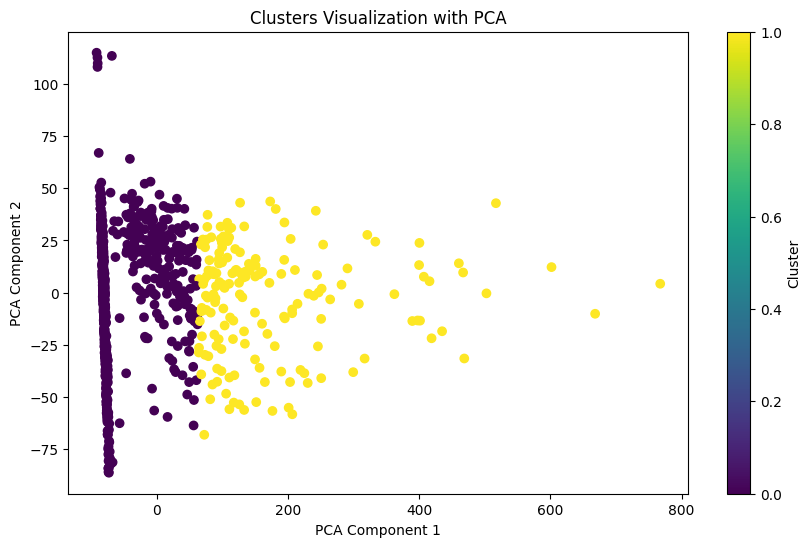

In [16]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()